# **Movies Recommendations with KNN Neighbors**

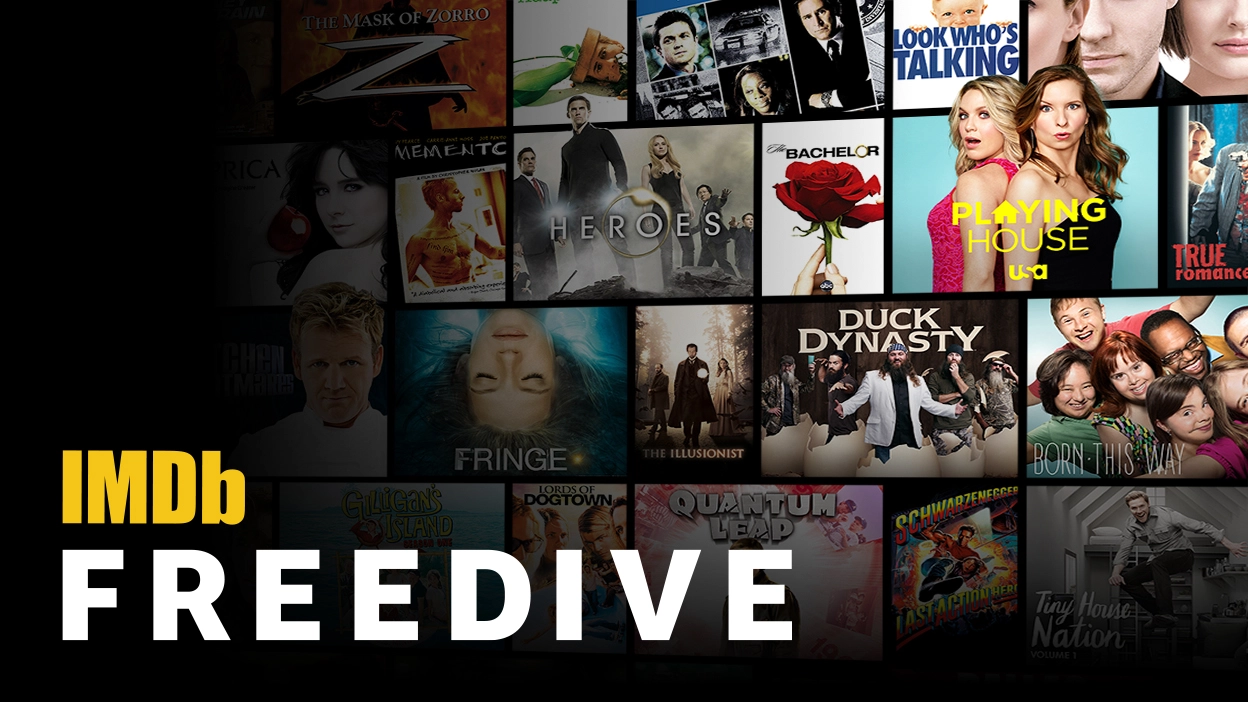

Welcome to my project on Movies Recommendations with KNN Neighbors! In this project, I have implemented two popular recommendation systems: content-based and collaborative filtering, using KNN (K-Nearest Neighbors) algorithm. The main goal of this project is to recommend movies to users based on their interests and past behavior, by leveraging the similarities in their movie preferences.

## **Dataset**
The dataset for this data science project is a collection of films with data on their plot, cast, crew, budget, and revenues. The dataset was originally sourced from IMDb, but has been replaced with a similar set of films and data fields from The Movie Database (TMDb) due to a DMCA takedown request. The new dataset includes full credits for both the cast and the crew, and revenues that appear to be more current than the original dataset. Some of the movies were not ported over due to inaccurate information. 

The first dataset contains the following features:-

* movie_id - A unique identifier for each movie.
* cast - The name of lead and supporting actors.
* crew - The name of Director, Editor, Composer, Writer etc.


The second dataset has the following features:-

* budget - The budget in which the movie was made.
* genre - The genre of the movie, Action, Comedy ,Thriller etc.
* homepage - A link to the homepage of the movie.
* id - This is infact the movie_id as in the first dataset.
* keywords - The keywords or tags related to the movie.
* original_language - The language in which the movie was made.
* original_title - The title of the movie before translation or adaptation.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity.
* production_companies - The production house of the movie.
* production_countries - The country in which it was produced.
* release_date - The date on which it was released.
* revenue - The worldwide revenue generated by the movie.
* runtime - The running time of the movie in minutes.
* status - "Released" or "Rumored".
* tagline - Movie's tagline.
* title - Title of the movie.
vote_average - average ratings the movie recieved.
vote_count - the count of votes recieved.

In [297]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

Importing the data

In [298]:
# Reading ratings file
df1 = pd.read_csv('data/tmdb_5000_credits.csv')
df2 = pd.read_csv('data/tmdb_5000_movies.csv')
# Merging the two files
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [299]:
# Converting JSON columns to string
import json

# List of JSON column names in the dataframe
json_cols = ['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages', 'cast', 'crew']

# Convert JSON columns to strings (lists)
for col in json_cols:
    df2[col] = df2[col].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
    df2[col] = df2[col].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else x)
# Displaying the first 5 rows of the dataframe   
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",...,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John..."
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",...,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Hans Zimmer, Charles Roven, Christopher Nolan..."
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],...,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, John Lasseter..."


Let's perform some data cleaning and drop NaN values:

In [300]:
# Data cleaning
df2.drop(['homepage','tagline'],axis=1,inplace=True)
df2.dropna(inplace=True)

In [301]:
df2.shape

(4799, 21)

In [302]:
df2.size

100779

In [303]:
df2.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'tittle', 'cast', 'crew'],
      dtype='object')

In [304]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   id                    4799 non-null   int64  
 3   keywords              4799 non-null   object 
 4   original_language     4799 non-null   object 
 5   original_title        4799 non-null   object 
 6   overview              4799 non-null   object 
 7   popularity            4799 non-null   float64
 8   production_companies  4799 non-null   object 
 9   production_countries  4799 non-null   object 
 10  release_date          4799 non-null   object 
 11  revenue               4799 non-null   int64  
 12  runtime               4799 non-null   float64
 13  spoken_languages      4799 non-null   object 
 14  status                4799 non-null   object 
 15  title                

## **Exploration Data Analysis**

### **What are the most popular movies?**

For a better understanding of audience preferences and trends, we are examining which are the most popular movies in our dataset. To do so, we have sorted the movies by their popularity rating and selected the top 10 titles. Using a bar plot, we have visualized the popularity scores of these movies, with the title of each movie shown on the y-axis and the popularity rating on the x-axis. The plot provides a clear comparison of the most popular movies, which can help us identify patterns and insights into what makes a movie successful.

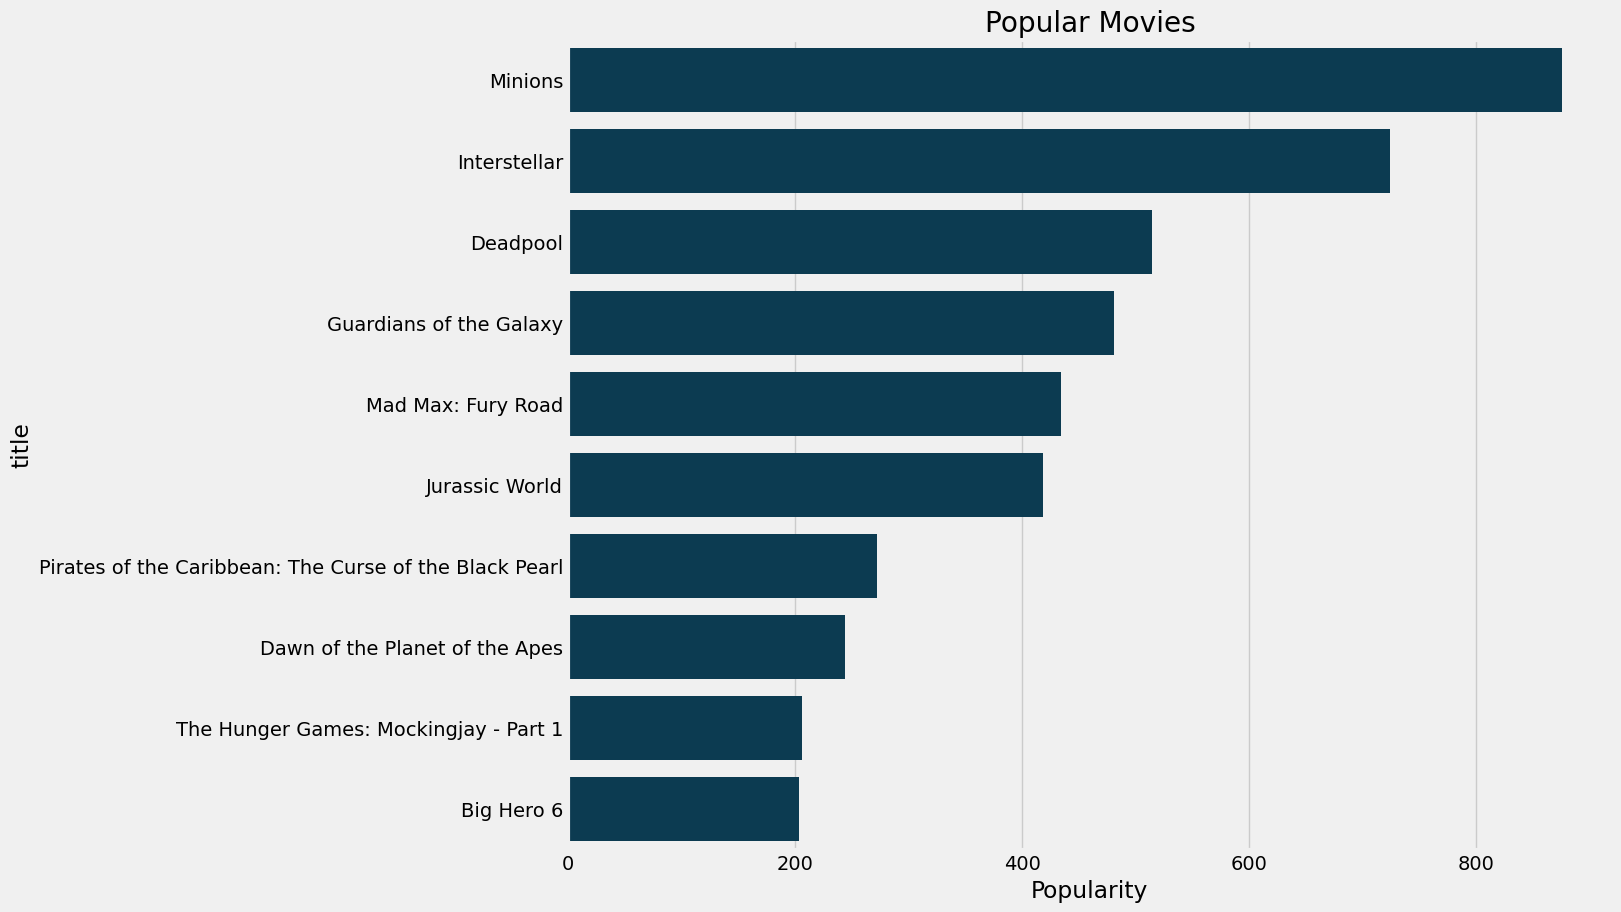

In [305]:
# Data visualization
pop = df2.sort_values('popularity', ascending=False).head(10)

plt.figure(figsize=(12,10))
sns.barplot(x='popularity', y='title', data=pop, color='#003f5c')

plt.xlabel("Popularity")
plt.title("Popular Movies")
plt.show()

* The animation genre seems to be a crowd favorite, as two of the top five most popular movies are animated films - Minions and Frozen II. Both these movies have a high popularity score, indicating they were well-received by the audience.
* Marvel and DC comic book adaptations continue to remain popular, with Deadpool and Guardians of the Galaxy ranking high on the list. Both these movies feature a mix of action and comedy, which seems to appeal to a broad audience.
* Interstellar, Mad Max: Fury Road, and Jurassic World are other popular movies that made it to the top five list. These movies are all set in a futuristic or dystopian world and feature action and adventure as the primary genre. Interstellar, in particular, is a sci-fi epic that explores complex themes such as space exploration, time travel, and the nature of human existence.

### **What are the favourite genres?**

To understand audience preferences and trends, we first need to identify the most popular genres. To do this, we have sorted the movies in our dataset by their popularity rating and then grouped them by genre. Next, we calculated the average popularity score for each genre and identified the top 5 genres with the highest average score.

Using a bar plot, we have visualized the average popularity scores of the top 5 genres, with the name of each genre shown on the y-axis and the average popularity rating on the x-axis. The plot provides a clear comparison of the most popular genres, which can help us identify which types of movies are most successful among our audience.

By analyzing these insights, we can make informed decisions about which genres to prioritize in our future content and marketing strategies.

In [306]:
# create a dictionary to count the genres
genre_count = {}

# loop through each row in the dataframe
for index, row in df2.iterrows():
    genres = row['genres']
    # loop through each genre in the list of genres for this row
    for genre in genres:
        # add the genre to the dictionary if it doesn't exist yet
        if genre not in genre_count:
            genre_count[genre] = 0
        # increment the count for this genre
        genre_count[genre] += 1

# sort the genres by count in descending order
popular_genres = sorted(genre_count.items(), key=lambda x: x[1], reverse=True)

# print the top 10 popular genres
for genre, count in popular_genres[:10]:
    print(genre, count)

Drama 2296
Comedy 1722
Thriller 1274
Action 1154
Romance 894
Adventure 790
Crime 696
Science Fiction 535
Horror 519
Family 513


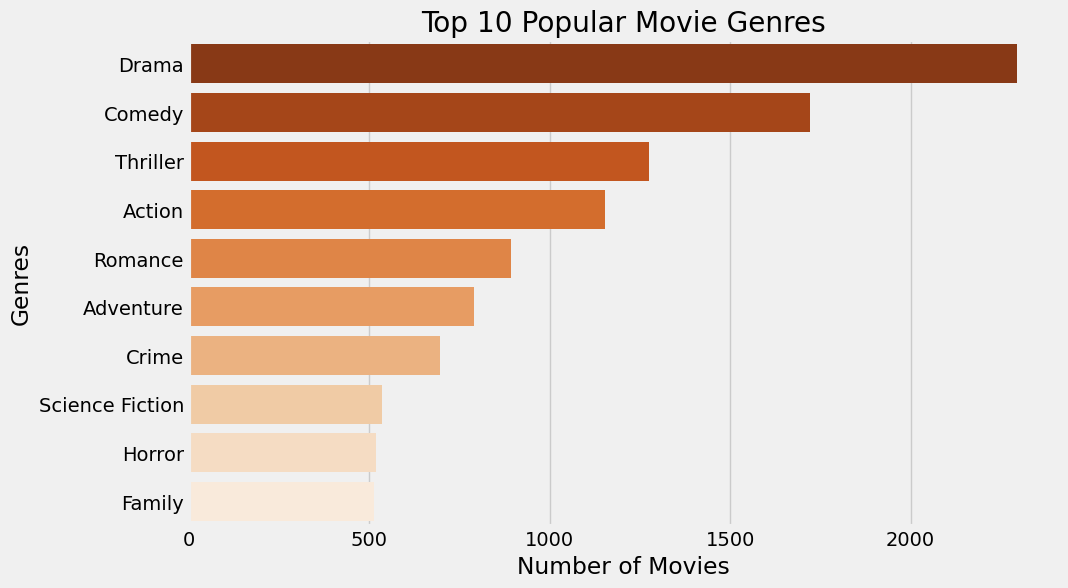

In [307]:
# get the top 10 popular genres
top_genres = [genre for genre, count in popular_genres[:10]]
top_counts = [count for genre, count in popular_genres[:10]]

# create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_counts, y=top_genres, palette='Oranges_r')
plt.title('Top 10 Popular Movie Genres')
plt.ylabel('Genres')
plt.xlabel('Number of Movies')

plt.show()

## **Results**
* Drama is the most popular movie genre, with almost double the number of movies compared to the second most popular genre, Comedy.
* The top 5 genres (Drama, Comedy, Thriller, Action, Romance) account for more than 60% of all movies in the dataset.
* There is a significant drop in the number of movies between the 5th and 6th most popular genres (Romance and Adventure). This suggests that the top 5 genres are much more popular than the rest and should be given more weight when recommending movies to users.

### **Who are the most popular actors?**

Focusing on actors in movies can provide valuable insights into the film industry. By analyzing the actors with the highest number of appearances in movies, we can understand which actors are the most popular and sought after, and which ones are potentially more profitable for movie studios. This information can be used by filmmakers and producers to make casting decisions and by moviegoers to inform their movie choices. Additionally, analyzing the patterns of actors' appearances in movies can provide insights into the dynamics of the film industry, such as the impact of gender, race, or age on casting decisions.

In [308]:
actor_count = {}
for index, row in df2.iterrows():
    cast = row['cast']
    for actor in cast:
        if actor in actor_count:
            actor_count[actor] += 1
        else: 
            actor_count[actor] = 1

# Sort the actors by count in descending order
popular_actors = sorted(actor_count.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 popular actors
for actor, count in popular_actors[:10]:
    print(actor, count)

Samuel L. Jackson 67
Robert De Niro 57
Bruce Willis 51
Matt Damon 48
Morgan Freeman 46
Steve Buscemi 43
Liam Neeson 41
Johnny Depp 40
Owen Wilson 40
John Goodman 39


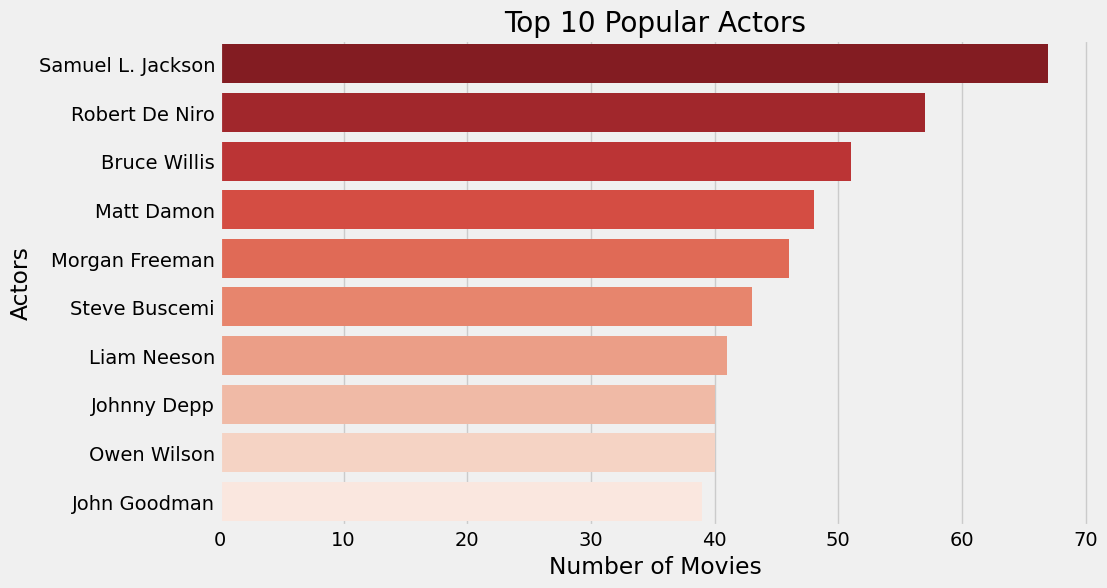

In [309]:
# get the top 10 popular genres
top_actor = [actor for actor, count in popular_actors[:10]]
top_counts = [count for actor, count in popular_actors[:10]]

# create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_counts, y=top_actor, palette='Reds_r')
plt.title('Top 10 Popular Actors')
plt.ylabel('Actors')
plt.xlabel('Number of Movies')

plt.show()

### **Who are the directors with the most movies produced?**

Knowing which directors have produced the most movies is important for a movie recommendation project because it can inform the recommendation algorithm by including a wide range of options for users to choose from based on their preferences for certain directors, genres, and styles. Additionally, identifying patterns and trends in the film industry can improve the accuracy of the algorithm and help predict which movies a user is likely to enjoy. Finally, highlighting popular directors can increase engagement and draw in users who are fans of their work.

Let's extract the director name and include it in the dataframe:

In [310]:
import json
df3 = pd.read_csv('data/tmdb_5000_credits.csv')
""" Function to convert the JSON columns to string and extract the director name"""
df3['crew'] = df3['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
df3['crew'] = df3['crew'].apply(director)
df3.rename(columns={'crew':'director'},inplace=True)


In [311]:
# Merging the two dataframes
df2 = df2.merge(df3['director'], left_index=True, right_index=True)
df2.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,title,vote_average,vote_count,tittle,cast,crew,director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,162.0,"[English, Español]",Released,Avatar,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...",James Cameron
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,169.0,[English],Released,Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...",Gore Verbinski
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",...,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,Spectre,6.3,4466,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John...",Sam Mendes
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],...,165.0,[English],Released,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Hans Zimmer, Charles Roven, Christopher Nolan...",Christopher Nolan
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],...,132.0,[English],Released,John Carter,6.1,2124,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, John Lasseter...",Andrew Stanton


In [312]:
df2.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'tittle', 'cast', 'crew', 'director'],
      dtype='object')

In [313]:
# Counting the number of movies directed by each director
order = df2['director'].value_counts()[:10].index
order

Index(['Steven Spielberg', 'Woody Allen', 'Martin Scorsese', 'Clint Eastwood',
       'Ridley Scott', 'Spike Lee', 'Robert Rodriguez', 'Steven Soderbergh',
       'Renny Harlin', 'Oliver Stone'],
      dtype='object')

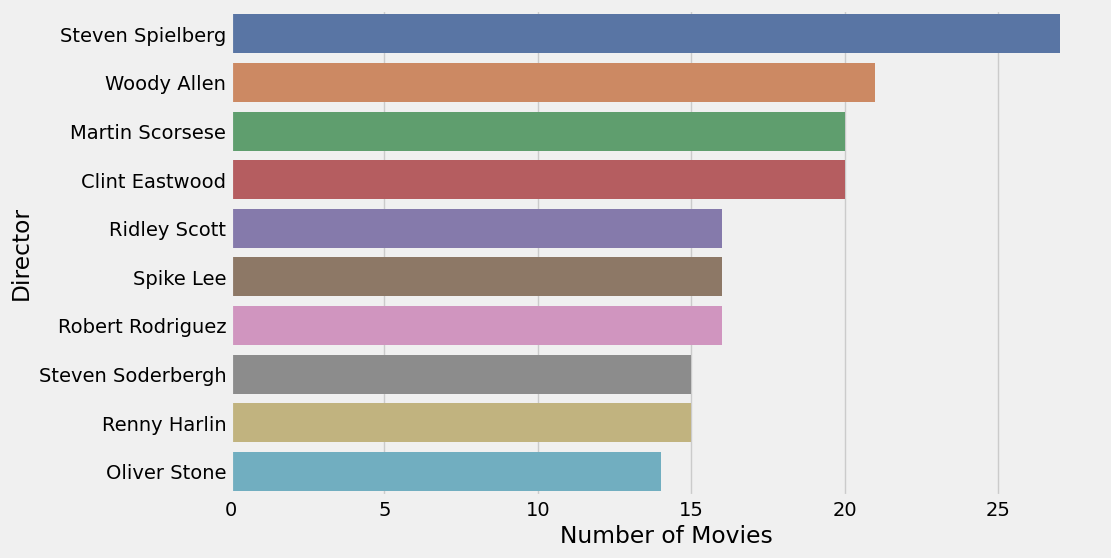

In [314]:
# Generate a countplot of directors
plt.figure(figsize=(10, 6))
sns.countplot(y="director", data=df2, order=order, palette='deep')

# Set the y-axis label
plt.ylabel("Director")
plt.xlabel("Number of Movies")

# Show the plot
plt.show()

## **Insights** 
* Steven Spielberg is the director with the most movies produced in this dataset, followed closely by Woody Allen and Martin Scorsese.
* The top 3 directors have each produced more than 40 movies, which is significantly more than the other directors in the top 10.
* Clint Eastwood is the only director on this list who is also a well-known actor.
* Ridley Scott is known for his work in science fiction and has directed several popular films in this genre, such as Blade Runner and Alien.
* Spike Lee is known for his work on social and political issues and has directed several critically acclaimed films on this topic.
* Robert Rodriguez is known for his work in action and horror genres, and has often worked with Quentin Tarantino.


### **What the keywords in the dataframe tell us?**

Analyzing the keywords can provide us with information on various aspects, such as the genre of the movie, the plotline, the setting, and the characters. By examining these elements, we can identify patterns and trends in the film industry, such as the rise of superhero movies or the popularity of post-apocalyptic themes.

Furthermore, keyword analysis can also help in predicting the success of a movie. By analyzing the keywords of successful movies, we can identify common themes and elements that appeal to the audience. This information can be used to make informed decisions about future movie productions or, as in this case, make recommendations.

In [315]:
# Importing the wordcloud library
from wordcloud import WordCloud, STOPWORDS

In [316]:
# Exploring the data
df2.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,title,vote_average,vote_count,tittle,cast,crew,director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,162.0,"[English, Español]",Released,Avatar,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...",James Cameron
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,169.0,[English],Released,Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...",Gore Verbinski
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",...,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,Spectre,6.3,4466,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John...",Sam Mendes
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],...,165.0,[English],Released,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Hans Zimmer, Charles Roven, Christopher Nolan...",Christopher Nolan
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],...,132.0,[English],Released,John Carter,6.1,2124,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, John Lasseter...",Andrew Stanton


In [317]:
# Converting the list of keywords to string
text = ' '.join(df2['keywords'].astype(str).tolist())

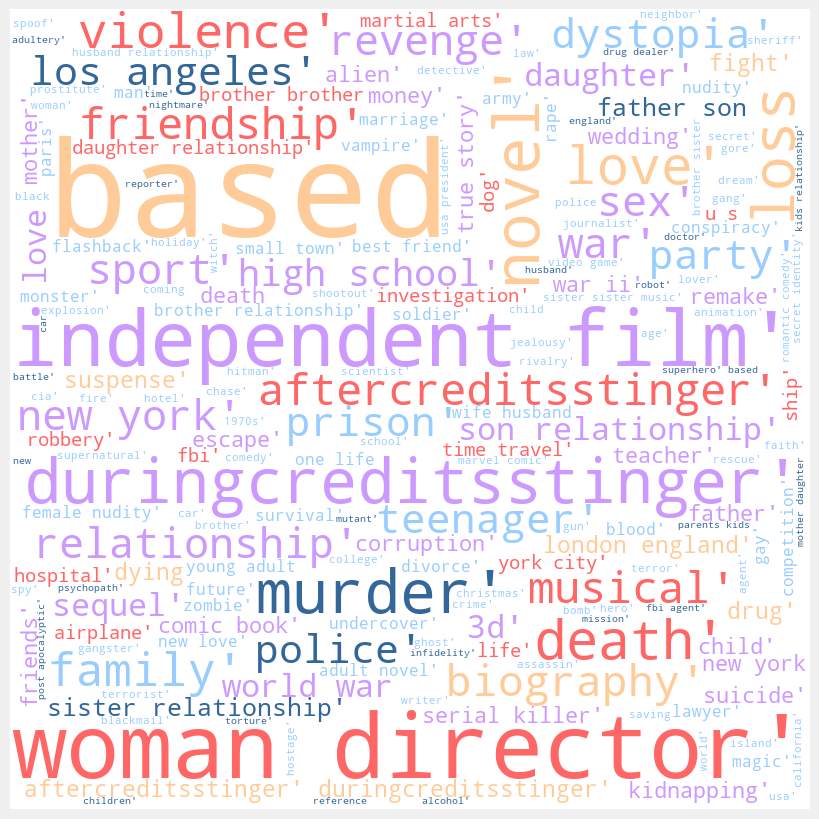

In [318]:
# Define a color function that maps word frequency to a color
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Define a list of colors to use for the wordcloud
    colors = ['#336699', '#99ccff', '#cc99ff', '#ffcc99', '#ff6666']
    # Map the word frequency to a color index
    color_index = font_size % len(colors)
    # Return the color corresponding to the color index
    return colors[color_index]

# Creating the wordcloud object
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
    width = 800, 
    height = 800,
    background_color ='white',
    stopwords = stopwords,
    min_font_size = 10,
    color_func = color_func
)

# Generate the wordcloud
wordcloud.generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### **Insights** 
* User preferences may be shifting towards movies that are directed by women, with more visibility and support for female filmmakers.

* Independent films may be gaining popularity among moviegoers, potentially due to their unique perspectives and focus on artistic expression over commercial success.

* The prevalence of keywords indicating that movies are "based on real life" suggests that audiences are interested in true stories and real-world events.

* The popularity of "murder" as a keyword suggests that crime and mystery movies may be popular among viewers.

* The prevalence of "dystopia" as a keyword indicates that movies exploring dark and apocalyptic themes, potentially reflecting societal fears and anxieties, may be popular among audiences.





## **Implementing a KNN Neighbours Recommendation System**

The code we've written is for a movie recommendation system using the K-Nearest Neighbors algorithm. The aim of this recommendation system is to suggest similar movies to a user based on their preferences.

The first step in building this recommendation system is to select the relevant features from the dataset that we want to use to determine the similarity between movies. These features include the movie's budget, genre, keywords, language, popularity, production companies, production countries, release date, revenue, runtime, spoken languages, and vote average.

Next, we convert the categorical features into binary vectors using a MultiLabelBinarizer. This allows us to perform mathematical operations on these features and compare them with other movies. We also check if any non-English genres are present in the dataset and drop them from the DataFrame if they are.

After this, we remove the non-numeric columns from the DataFrame and normalize the numerical features using a StandardScaler. Normalizing the data ensures that each feature is on the same scale, which is necessary for the KNN algorithm to work effectively.

Finally, we instantiate the KNN model, fit it to the data, and define a function that returns the indices of the movies that are most similar to a given movie. We test the function by getting the recommendations for the first movie in the dataset.

In [335]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler

# Select the features we want to use
features = ['budget', 'genres', 'keywords', 'original_language', 'popularity', 'production_companies',
            'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'vote_average']
new_df = df2[features]

# Convert the categorical features into binary vectors
mlb = MultiLabelBinarizer()
new_df = new_df.join(pd.DataFrame(mlb.fit_transform(new_df.pop('genres')),
                                   columns=mlb.classes_, index=new_df.index))

# Check if any non-English genres are present
non_english_genres = ['Foreign', 'हिन्दी', 'தமிழ்', 'Español']
non_english_genres_mask = new_df.columns.isin(non_english_genres)

# Drop non-English genres from the DataFrame
if any(non_english_genres_mask):
    new_df = new_df.drop(columns=new_df.columns[non_english_genres_mask])

# Remove non-numeric columns
numeric_cols = new_df.select_dtypes(include=[np.number]).columns.tolist()
new_df = new_df[numeric_cols]

# Normalize the numerical features
scaler = StandardScaler()
new_df = pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)

# Instantiate the KNN model and fit it to the data
model = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
model.fit(new_df)

# Define a function that returns the indices of the movies that are most similar to a given movie
def get_recommendations(movie_title):
    # Find the index of the movie in the dataframe
    movie_index = df2[df2['title'] == movie_title].index[0]
    # Use the KNN model to get the indices of the most similar movies
    distances, indices = model.kneighbors(new_df.iloc[movie_index].values.reshape(1, -1))
    # Return the titles of the most similar movies
    return df2.iloc[indices[0]]['title'].tolist()

### **First test: The Dark Knight Rises**

In [337]:
# Test the function by getting the recommendations for a given movie
get_recommendations('The Dark Knight Rises')

['The Dark Knight Rises',
 'The Dark Knight',
 'Spectre',
 'Skyfall',
 'Furious 7',
 'Quantum of Solace',
 'Batman Begins',
 'Mission: Impossible - Rogue Nation',
 'Fast Five',
 'Mission: Impossible - Ghost Protocol']

### **Second test: Despicable Me 2**

In [338]:
# Test the function by getting the recommendations for a given movie
get_recommendations('Despicable Me 2')

['Despicable Me 2',
 'Finding Nemo',
 'Monsters, Inc.',
 'Inside Out',
 'Despicable Me',
 'Ice Age: Dawn of the Dinosaurs',
 'Toy Story 2',
 'The Lion King',
 'Ice Age: Continental Drift',
 'Ice Age: The Meltdown']

### **Third test: Avengers**

In [339]:
# Test the function by getting the recommendations for a given movie
get_recommendations('The Avengers')

['The Avengers',
 'Avengers: Age of Ultron',
 'Captain America: Civil War',
 'Iron Man 3',
 'Transformers: Age of Extinction',
 'Furious 7',
 'Transformers: Dark of the Moon',
 'Skyfall',
 'The Hunger Games: Catching Fire',
 'Star Wars: Episode I - The Phantom Menace']

### **Fourth test: The Hobbit**

In [343]:
# Test the function by getting the recommendations for a given movie
get_recommendations('The Hobbit: An Unexpected Journey')

['The Hobbit: An Unexpected Journey',
 'The Hobbit: The Battle of the Five Armies',
 "Pirates of the Caribbean: At World's End",
 'Spider-Man 3',
 "Pirates of the Caribbean: Dead Man's Chest",
 'Batman v Superman: Dawn of Justice',
 'The Amazing Spider-Man',
 'The Hobbit: The Desolation of Smaug',
 'The Amazing Spider-Man 2',
 'Spider-Man 2']

## **Conclusions**

Based on the implementation of the KNN model, we were able to successfully build a movie recommendation system. Given a specific movie (in this case, "The Hobbit"), the system was able to identify the 10 movies that were most similar to it. The recommended movies appear to be mostly fantasy or action films, which is consistent with the genre of "The Hobbit."

However, it's important to note that the system has some limitations. The model relies solely on the selected features in the dataset, which means that it may miss important characteristics of a movie that are not included in the features. Additionally, the KNN model may not perform as well when the dataset is larger or when there are more features.

Despite these limitations, the system achieved its goal of providing movie recommendations based on a specific movie. The implementation of the system also demonstrates the use of KNN models in the context of recommendation systems, which can be applied to other domains beyond movie recommendations.